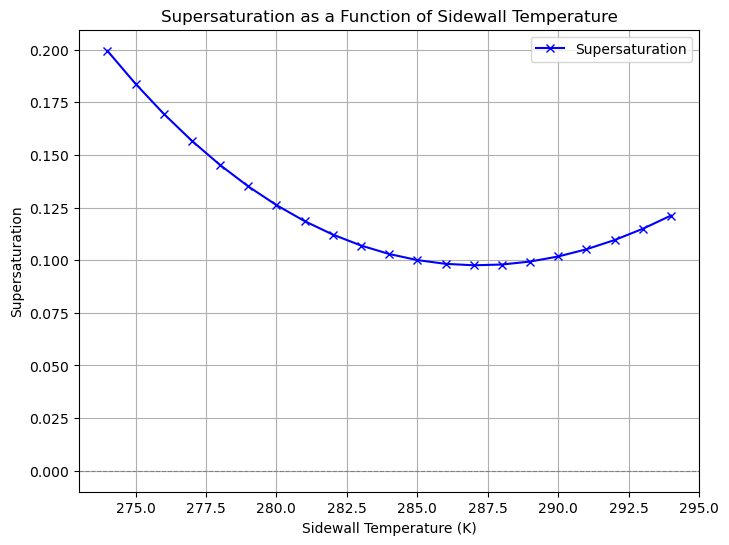

Supersaturation for T_s = 293.15 K: 0.1158


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L_v = 2.5e6        # Latent heat of vaporization (J/kg)
R_v = 461.5        # Specific gas constant for water vapor (J/(kg·K))
R_air = 287        # Specific gas constant for dry air (J/(kg·K))
T_0 = 273.15       # Reference temperature (K)
e_0 = 611.2        # Reference vapor pressure at T_0 (Pa)
P_atm = 101325     # Atmospheric pressure (Pa)
D = 2.5e-5         # Diffusion coefficient for water vapor in air (m²/s)
lambda_layer = 0.01  # Boundary layer thickness (meters)

# Chamber dimensions
radius = 1         # Radius of the circular chamber (meters)
height = 1         # Height of the chamber (meters)

# Wall temperatures (K)
T_b = 294          # Bottom boundary temperature (30°C)
T_t = 274          # Top boundary temperature (10°C)

# Time period in hours
time_period_hours = 1 

# Function for calculating saturation vapor pressure
def saturation_vapor_pressure(T_kelvin):
    return e_0 * np.exp((L_v / R_v) * (1 / T_0 - 1 / T_kelvin))

# Function to compute supersaturation as a function of T_s (in Kelvin)
def compute_supersaturation(T_s_kelvin):
    # Saturation vapor pressures
    e_b = saturation_vapor_pressure(T_b)
    e_t = saturation_vapor_pressure(T_t)
    e_s = saturation_vapor_pressure(T_s_kelvin)

    # Geometry calculations
    A_b = np.pi * radius**2           # Bottom area
    A_t = np.pi * radius**2           # Top area
    A_s = 2 * np.pi * radius * height  # Sidewall area

    # Mean temperature
    T_mean = (T_b * A_b + T_t * A_t + T_s_kelvin * A_s) / (A_b + A_t + A_s)

    # Mean vapor pressure
    e_mean = (e_b * A_b + e_t * A_t + e_s * A_s) / (A_b + A_t + A_s)

    # Supersaturation
    e_s_mean = saturation_vapor_pressure(T_mean)
    supersaturation = (e_mean / e_s_mean) - 1

    return supersaturation

# Evaluate supersaturation for a range of sidewall temperatures in Kelvin
T_s_range_kelvin = np.arange(274, 294 + 1, 1)  # Sidewall temperatures from 274 K to 294 K
supersaturation_values = [compute_supersaturation(T_s) for T_s in T_s_range_kelvin]

# Plot supersaturation vs. sidewall temperature
plt.figure(figsize=(8, 6))
plt.plot(T_s_range_kelvin, supersaturation_values, marker='x', label="Supersaturation", color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Supersaturation as a Function of Sidewall Temperature")
plt.xlabel("Sidewall Temperature (K)")
plt.ylabel("Supersaturation")
plt.grid(True)
plt.legend()
plt.show()

# Original computation for a specific T_s
T_s = 293.15  # Example sidewall temperature in Kelvin (20°C)
e_b = saturation_vapor_pressure(T_b)
e_t = saturation_vapor_pressure(T_t)
e_s = saturation_vapor_pressure(T_s)

# Geometry calculations for specific T_s
A_b = np.pi * radius**2           # Bottom area
A_t = np.pi * radius**2           # Top area
A_s = 2 * np.pi * radius * height  # Sidewall area

# Mean temperature
T_mean = (T_b * A_b + T_t * A_t + T_s * A_s) / (A_b + A_t + A_s)

# Mean vapor pressure
e_mean = (e_b * A_b + e_t * A_t + e_s * A_s) / (A_b + A_t + A_s)

# Supersaturation for specific T_s
e_s_mean = saturation_vapor_pressure(T_mean)
supersaturation = (e_mean / e_s_mean) - 1

print(f"Supersaturation for T_s = {T_s:.2f} K: {supersaturation:.4f}")